This notebook serves for the asigment of capstone project of IBM AI workflow specialization

## Case Study - Part 1
This is a regression problem


In [4]:
#Import libraries of importance
from cslib import *


In [5]:
#loading the data and create 
#a dataframe for trainig model purposes
path_data_train='./cs-train'
df_raw=  fetch_data(path_data_train)
df_raw.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [6]:
# For answering week 3 quiz question 1
df_invoice_date=df_raw['invoice_date'].unique()
span_days=df_invoice_date.max()-df_invoice_date.min()
span_days=span_days.astype('timedelta64[D]')
days_num=span_days/np.timedelta64(1, 'D')
print('Number of days: ',days_num)

Number of days:  610.0


In [7]:
df_ts=convert_to_ts(df_raw)

In [8]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
date               607 non-null datetime64[ns]
purchases          607 non-null int32
unique_invoices    607 non-null int64
unique_streams     607 non-null int64
total_views        607 non-null int64
year_month         607 non-null object
revenue            607 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 30.9+ KB


In [9]:
# For answering week 3 quiz question 2
df_ts_UK=convert_to_ts(df_raw, country='United Kingdom')
df_ts_Sg=convert_to_ts(df_raw, country='Singapore')
df_ts_USA=convert_to_ts(df_raw, country='USA')
df_ts_EIRE=convert_to_ts(df_raw, country='EIRE')
df_ts_Ge=convert_to_ts(df_raw, country='Germany')

In [10]:
df_total_revenue=pd.DataFrame({'Country':['UK','Singapore','USA','EIRE','Germany'],
                              'Revenue':[df_ts_UK['revenue'].sum(),df_ts_Sg['revenue'].sum(),df_ts_USA['revenue'].sum(),df_ts_EIRE['revenue'].sum(),df_ts_Ge['revenue'].sum()]})

df_total_revenue

,Country,Revenue
0,UK,3343551.644
1,Singapore,12945.460
2,USA,1110.900
3,EIRE,104589.400
4,Germany,45651.261


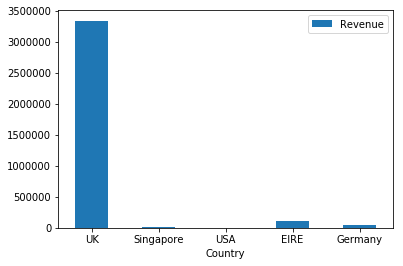

In [11]:
%matplotlib inline
ax = df_total_revenue.plot.bar(x='Country', y='Revenue', rot=0)

In [12]:
df_total_revenue[df_total_revenue['Revenue']==df_total_revenue['Revenue'].max()]

,Country,Revenue
0,UK,3343551.644


In [13]:
X,y,dates=engineer_features(df_ts)

In [14]:
X

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,14450.54,14450.54,14450.540,14450.540,0.00,5.928571,537.392857
1,27862.50,27862.50,27862.500,27862.500,0.00,10.310345,1007.103448
2,41152.75,41152.75,41152.750,41152.750,0.00,14.966667,1499.066667
3,50840.03,50840.03,50840.030,50840.030,0.00,18.533333,1916.533333
4,52283.29,52283.29,52283.290,52283.290,0.00,19.600000,2026.966667
5,58716.23,58716.23,58716.230,58716.230,0.00,22.600000,2311.766667
6,71853.73,71853.73,71853.730,71853.730,0.00,26.700000,2736.800000
7,66870.20,81320.74,81320.740,81320.740,0.00,32.366667,3156.933333
8,64726.78,92589.28,92589.280,92589.280,0.00,36.166667,3507.266667
9,62413.13,103565.88,103565.880,103565.880,0.00,40.266667,3906.766667


## Case Study - Part 2
